## 1.) Two sum(easy)
Given an array of integers, return indices of the two numbers such that they add up to a specific target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

Example:
```bash
Given nums = [2, 7, 11, 15], target = 9,

Because nums[0] + nums[1] = 2 + 7 = 9,
return [0, 1].

```

In [2]:
class Solution:
    def twoSum( self, nums, target):
        """
        :type nums: List[int]
        :type target: int
        :rtype: List[int]
        """
        solution = {}
        for inum,num in enumerate(nums):
            solution[target-num] = inum
        for inum,num in enumerate(nums):
            if num in solution and inum!=solution[num]:
                return inum, solution[num]
listN = [7, 11,2, 15] 
a = Solution()
a.twoSum(listN,9)
           

(0, 2)

### Results
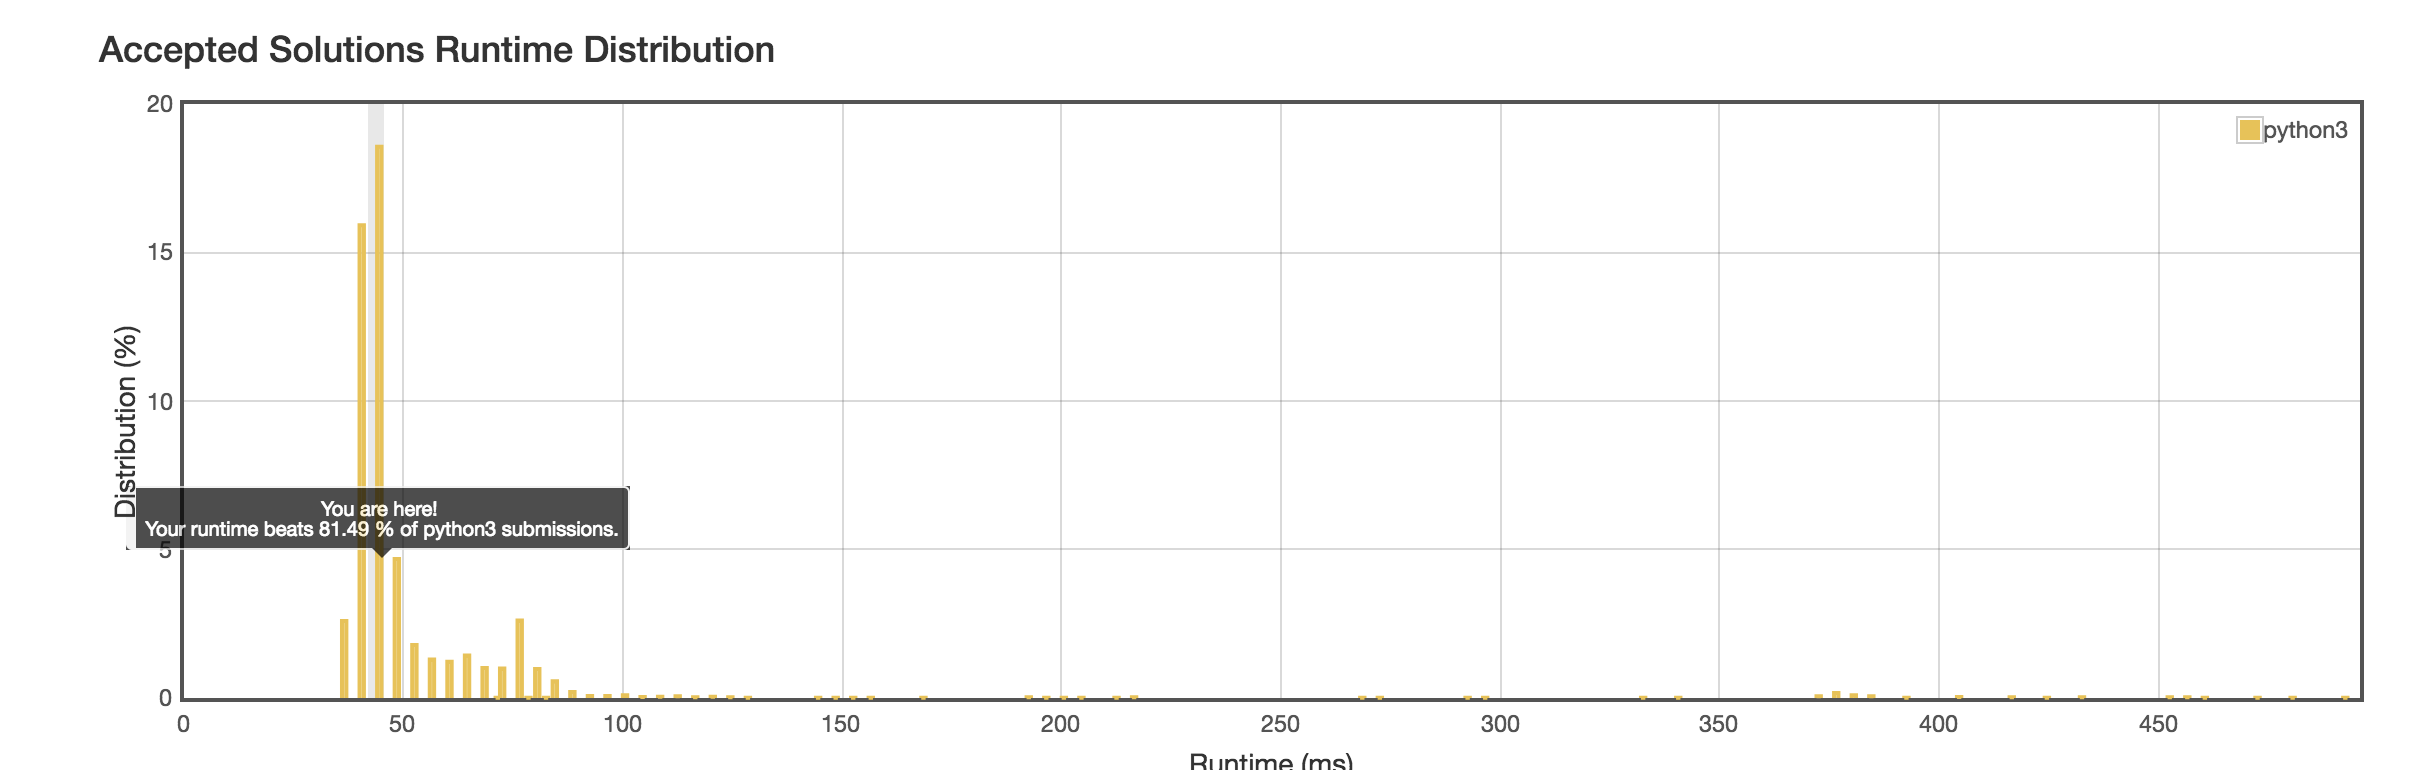

## 3.) Longest Substring Without Repeating Characters(medium)
Given a string, find the length of the longest substring without repeating characters.

Examples:
```bash
Given "abcabcbb", the answer is "abc", which the length is 3.

Given "bbbbb", the answer is "b", with the length of 1.

Given "pwwkew", the answer is "wke", with the length of 3. Note that the answer must be a substring, "pwke" is a subsequence and not a substring.
```

In [3]:
class Solution:
    def lengthOfLongestSubstring(self, s):
        """
        :type s: str
        :rtype: int
        """
        long_str = ''
        for ii in range(len(s)):
            temp_str = s[ii]
            for window in range(ii+1,len(s)):
                if s[window] in temp_str:
                    break
                else:
                    temp_str+=s[window]
            if len(temp_str) > len(long_str):
                long_str = temp_str
        return len(long_str)
    
b = Solution()
list_o_string = ['abcabcbb', 'bbbbb', 'pwwkew']
for a in list_o_string:
    print(b.lengthOfLongestSubstring(a))

3
1
3


### Results
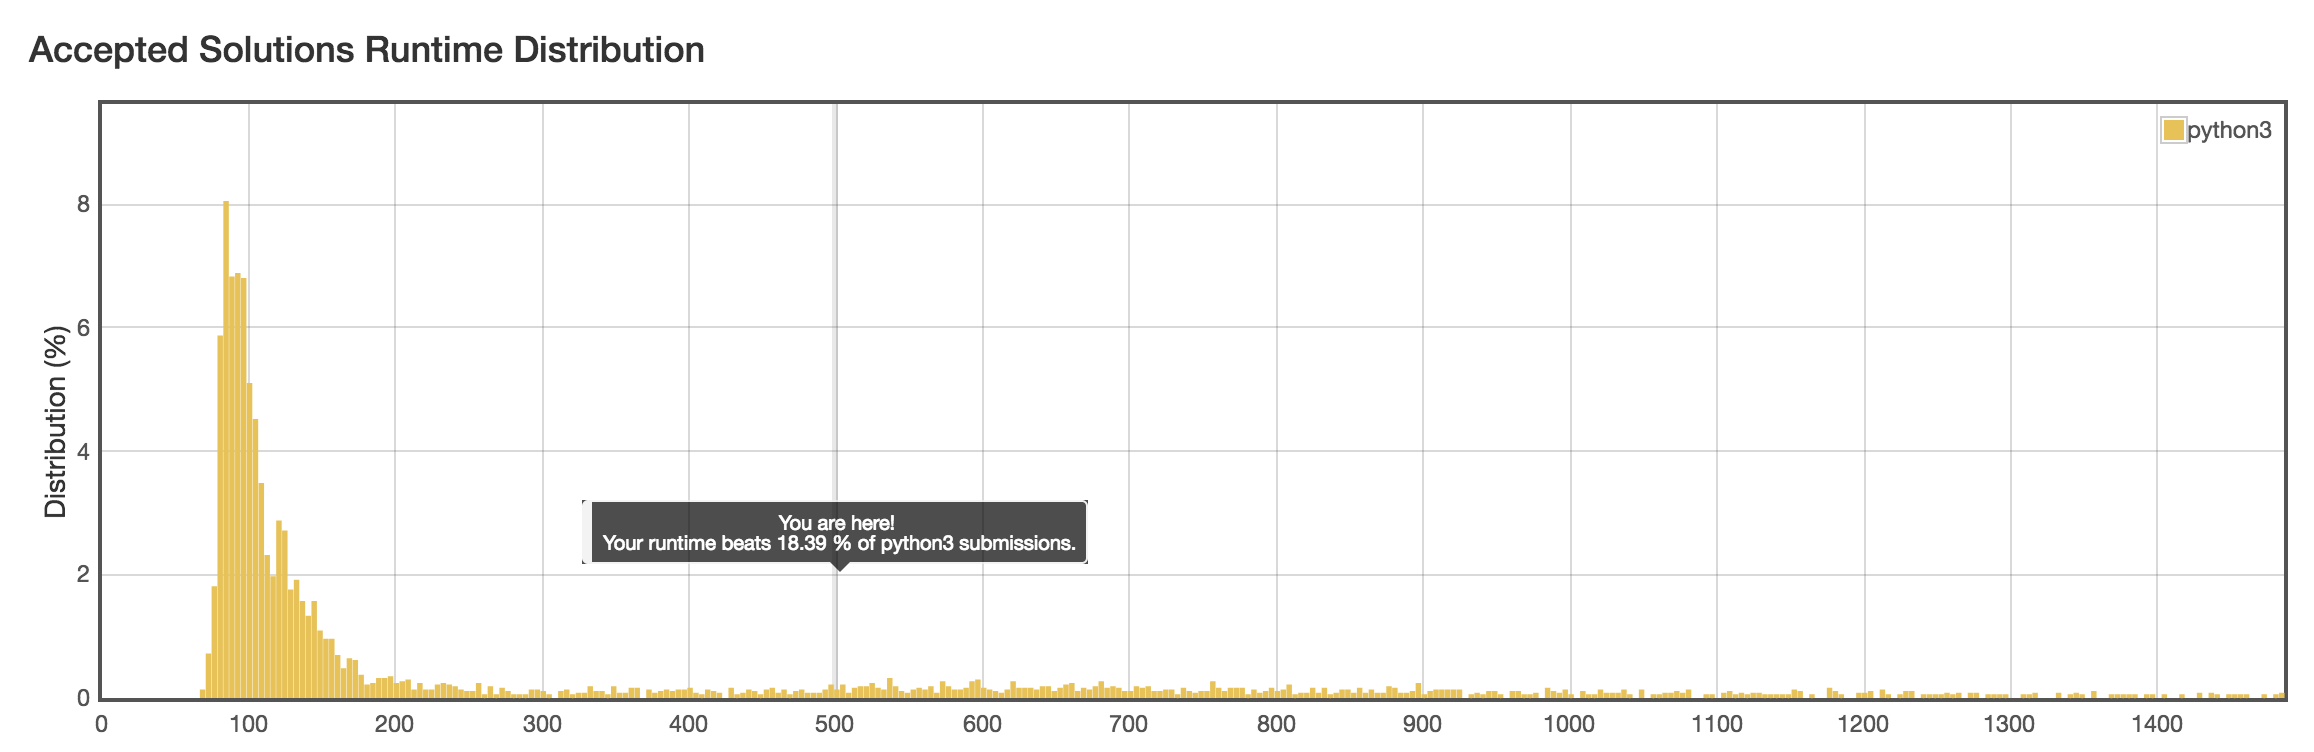
Not great, can we speed it up?  Next solution is based on suggested solution in leetcode [approach3](https://leetcode.com/articles/longest-substring-without-repeating-characters/), we scan the string and keep a dictionary with letters previously seen and their location. Wasn't hard to understand but subtle to implement because of many edge cases

In [4]:
class Solution:
    def lengthOfLongestSubstring(self, s):
        """
        :type s: str
        :rtype: int
        """
        if s == '':
            return 0
        start =0
        length = 0
        long_str = {}
        for ii in range(len(s)):      
            if s[ii] not in long_str:
                long_str[s[ii]] = ii
            else:
                start = max(start,long_str[s[ii]]+1)
                long_str[s[ii]] = ii
            length = max(length,ii-start+1)
        return length

b = Solution()
#list_o_string = ['abcaffbcbb']
list_o_string = ['abcaffbcbb', 'bbbbb', 'pwwkew','dvdf','c','au']
for a in list_o_string:
    print(a,'\t\t', b.lengthOfLongestSubstring(a))

abcaffbcbb 		 4
bbbbb 		 1
pwwkew 		 3
dvdf 		 3
c 		 1
au 		 2


### Results
Sizeable improvement, required more thinking thorugh
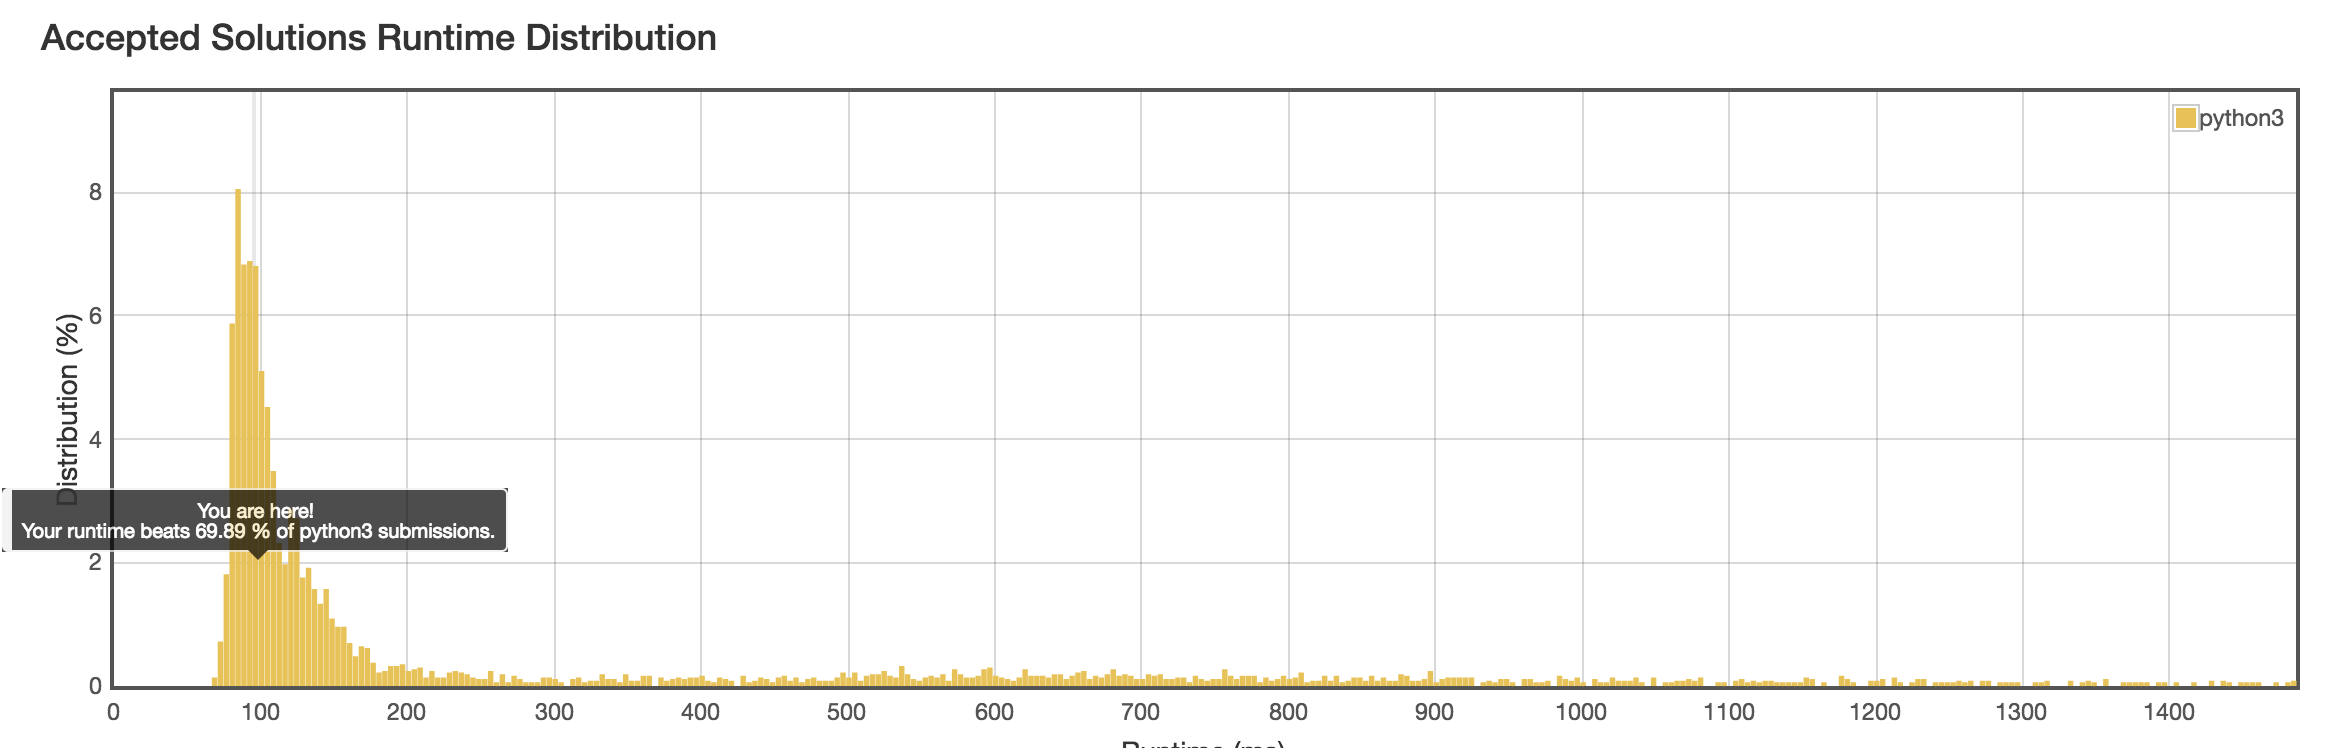

## 5.) Longest Palindromic Substring
Given a string s, find the longest palindromic substring in s. You may assume that the maximum length of s is 1000.
```
Example 1:

Input: "babad"
Output: "bab"
```
Note: "aba" is also a valid answer.
```
Example 2:

Input: "cbbd"
Output: "bb"
```
Lets start with naive aporach, with some sort of recursion. Find a seed palindrome and build up

In [88]:

def grow_drome(s, i_low, i_high):
    low = i_low-1
    high = i_high+1
    if low < 0 or high > len(s)-1:
        return i_low, i_high
    if s[low] == s[high]:
        i_low, i_high = grow_drome(s,low, high)
    return i_low, i_high

class Solution:    
    def longestPalindrome(self, s):
        """
        :type s: str
        :rtype: str
        """
        self.s = s
        palindrome = s[0]
        for ii in range(1, len(s)):
            if s[ii] == s[ii-1]:  
                low, high = grow_drome(s, ii-1,ii)
                if high - low +1 > len(palindrome):
                    palindrome = s[low:high+1]
            
            low, high = grow_drome(s, ii,ii)
            if high-low+1 > len(palindrome):
                palindrome = s[low:high+1]
        return palindrome

                      
list_of_sols = ['babad', 'cddb']
a = Solution()
for ll in list_of_sols:
    print(a.longestPalindrome(ll))
    
            
            

bab
dd


## Results
This fel hard, it took me a while (fighting against python)... didn't even do average
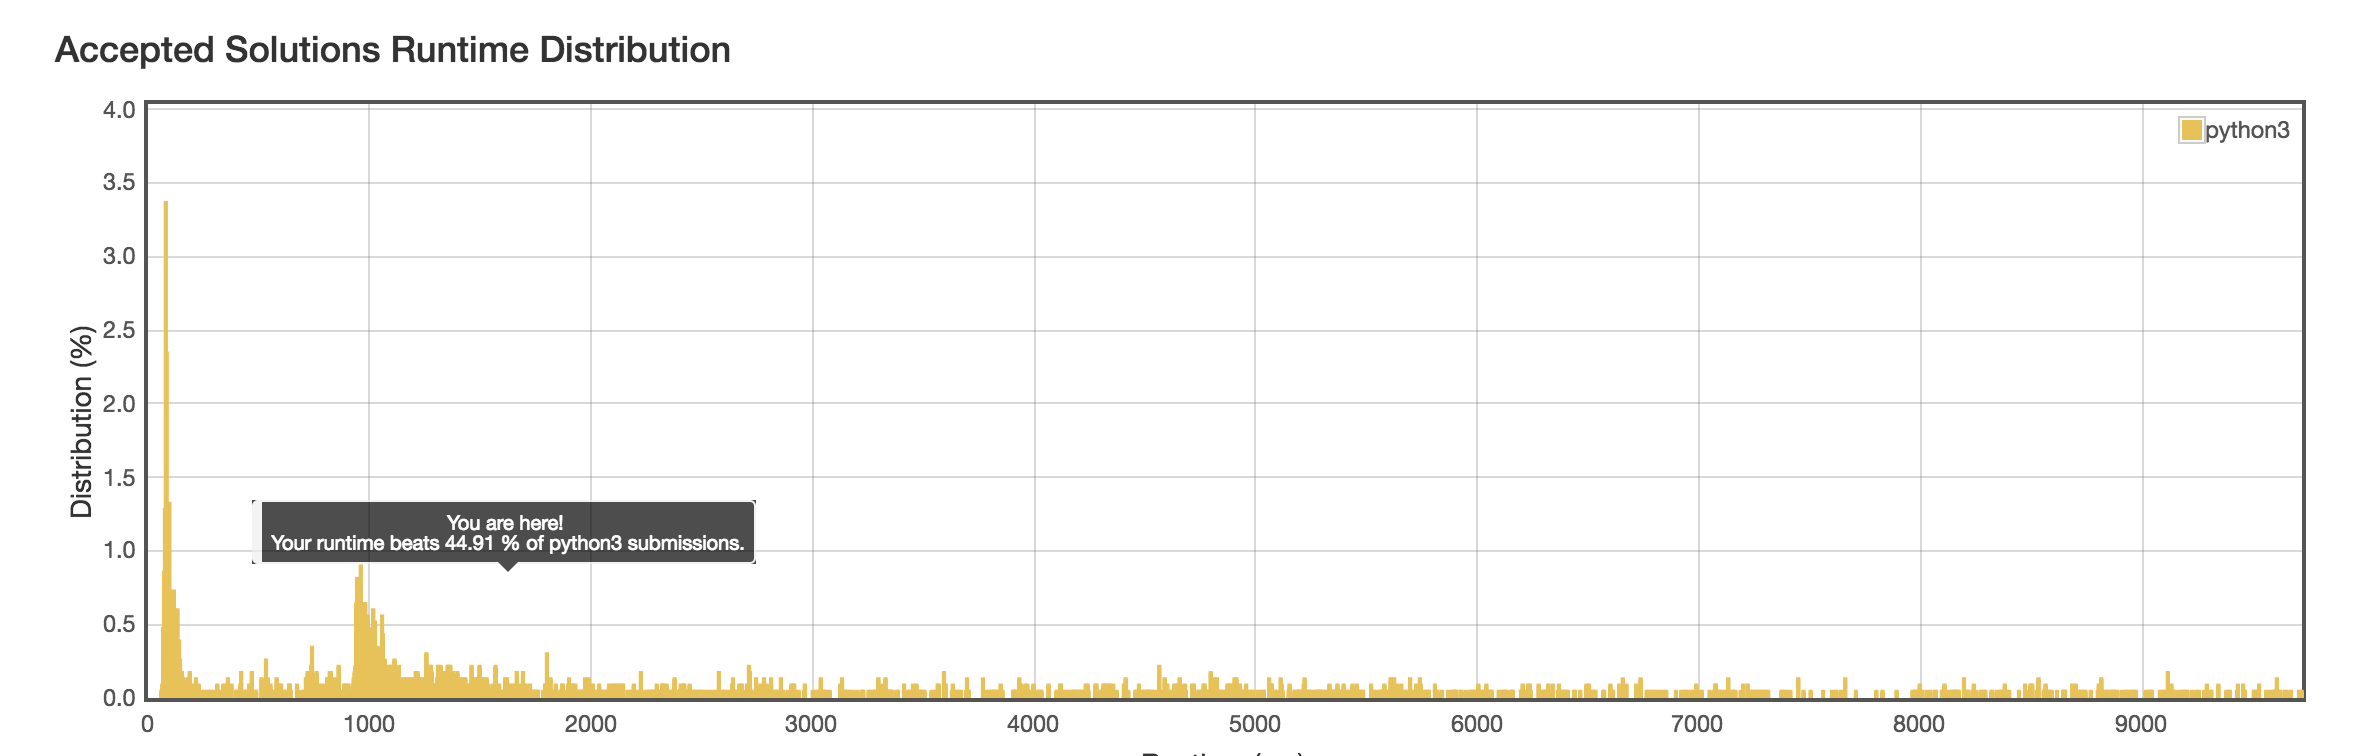

## 7.) Reverse integer
Given a 32-bit signed integer, reverse digits of an integer.

Example 1:
```bash
Input: 123
Output: 321

```
Example 2:
```bash
Input: -123
Output: -321
```

Example 3:
```bash
Input: 120
Output: 21

```
Note:
Assume we are dealing with an environment which could only store integers within the 32-bit signed integer range: [−231,  231 − 1]. For the purpose of this problem, assume that your function returns 0 when the reversed integer overflows.

In [8]:
int_min = -2**31
int_max = -int_min-1
class Solution:
    def reverse(self, x):
        """
        :type x: int
        :rtype: int
        """
        if x < 0:
            sign = -1
        else:
            sign = 1
        aa = str(abs(x))
        rev = int(aa[::-1])
        if rev < int_min or rev > int_max:
            return 0
        else:
            return sign*rev
        
a = Solution()
print(a.reverse(-211))

-112


## Results
Naive approach does surprisingly well
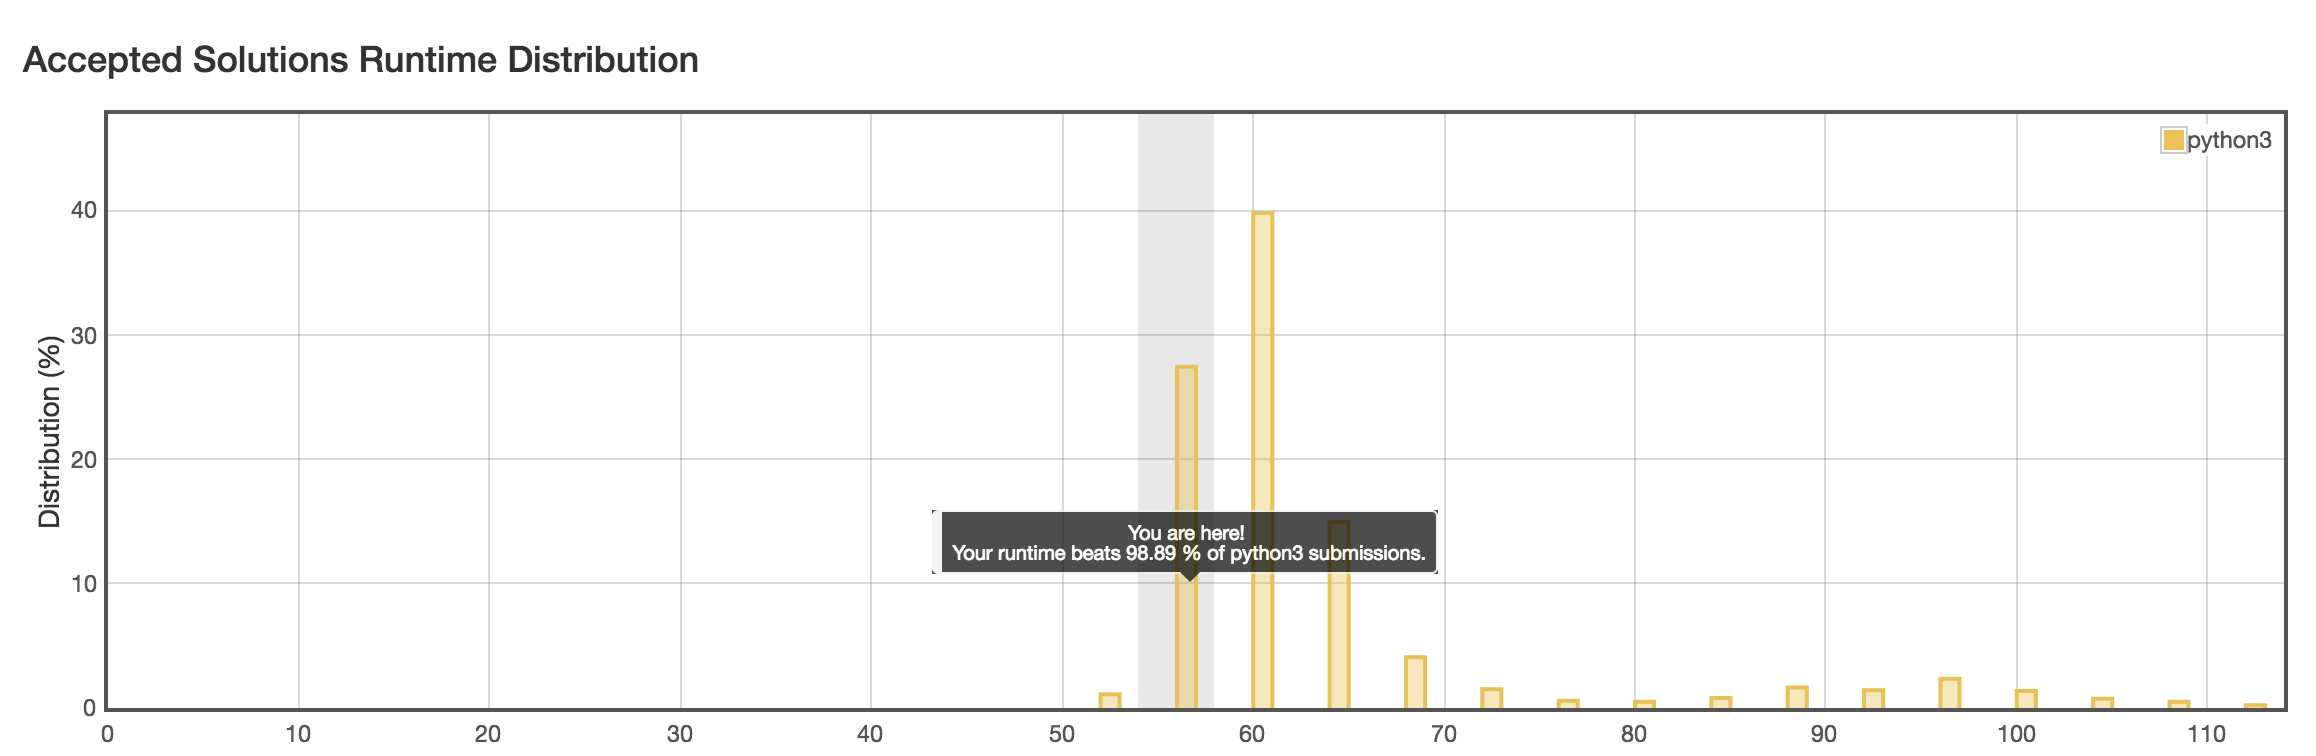

## 6.) ZigZag Conversion(medium)
The string "PAYPALISHIRING" is written in a zigzag pattern on a given number of rows like this: (you may want to display this pattern in a fixed font for better legibility)
```bash
P   A   H   N
A P L S I I G
Y   I   R
```
And then read line by line: "PAHNAPLSIIGYIR"

Write the code that will take a string and make this conversion given a number of rows:

string convert(string s, int numRows);
Example 1:
```bash
Input: s = "PAYPALISHIRING", numRows = 3
Output: "PAHNAPLSIIGYIR"
```
Example 2:
```bash
Input: s = "PAYPALISHIRING", numRows = 4
Output: "PINALSIGYAHRPI"
```
Explanation:
```bash
P     I    N
A   L S  I G
Y A   H R
P     I
```
My naive apporach: we can iterate over the string but it will be wasteful as hell. Instead, can we look for patterns? For n rows a row will utilize n+(n-2) = 2(n-1). Can we simply split and arrange an array in such a way?

In [26]:
class Solution:
    def convert(self, s, numRows):
        """
        :type s: str
        :type numRows: int
        :rtype: str
        """
        if numRows == 1:
            return s
        row_n = [ '' for a in range(numRows)]
        block = 2*(numRows-1)
        for ii in range(len(s)):
            mod = ii%block
            if mod < numRows:
                row_n[mod]+=s[ii]
            else:
                row_n[block-mod]+=s[ii]
        to_ret = ''
        for line in row_n:
            print(line)
            to_ret+=line
        return to_ret
            

## Results
Did ok with naive approach, but only had to consider one edge case: when the numRows==1 
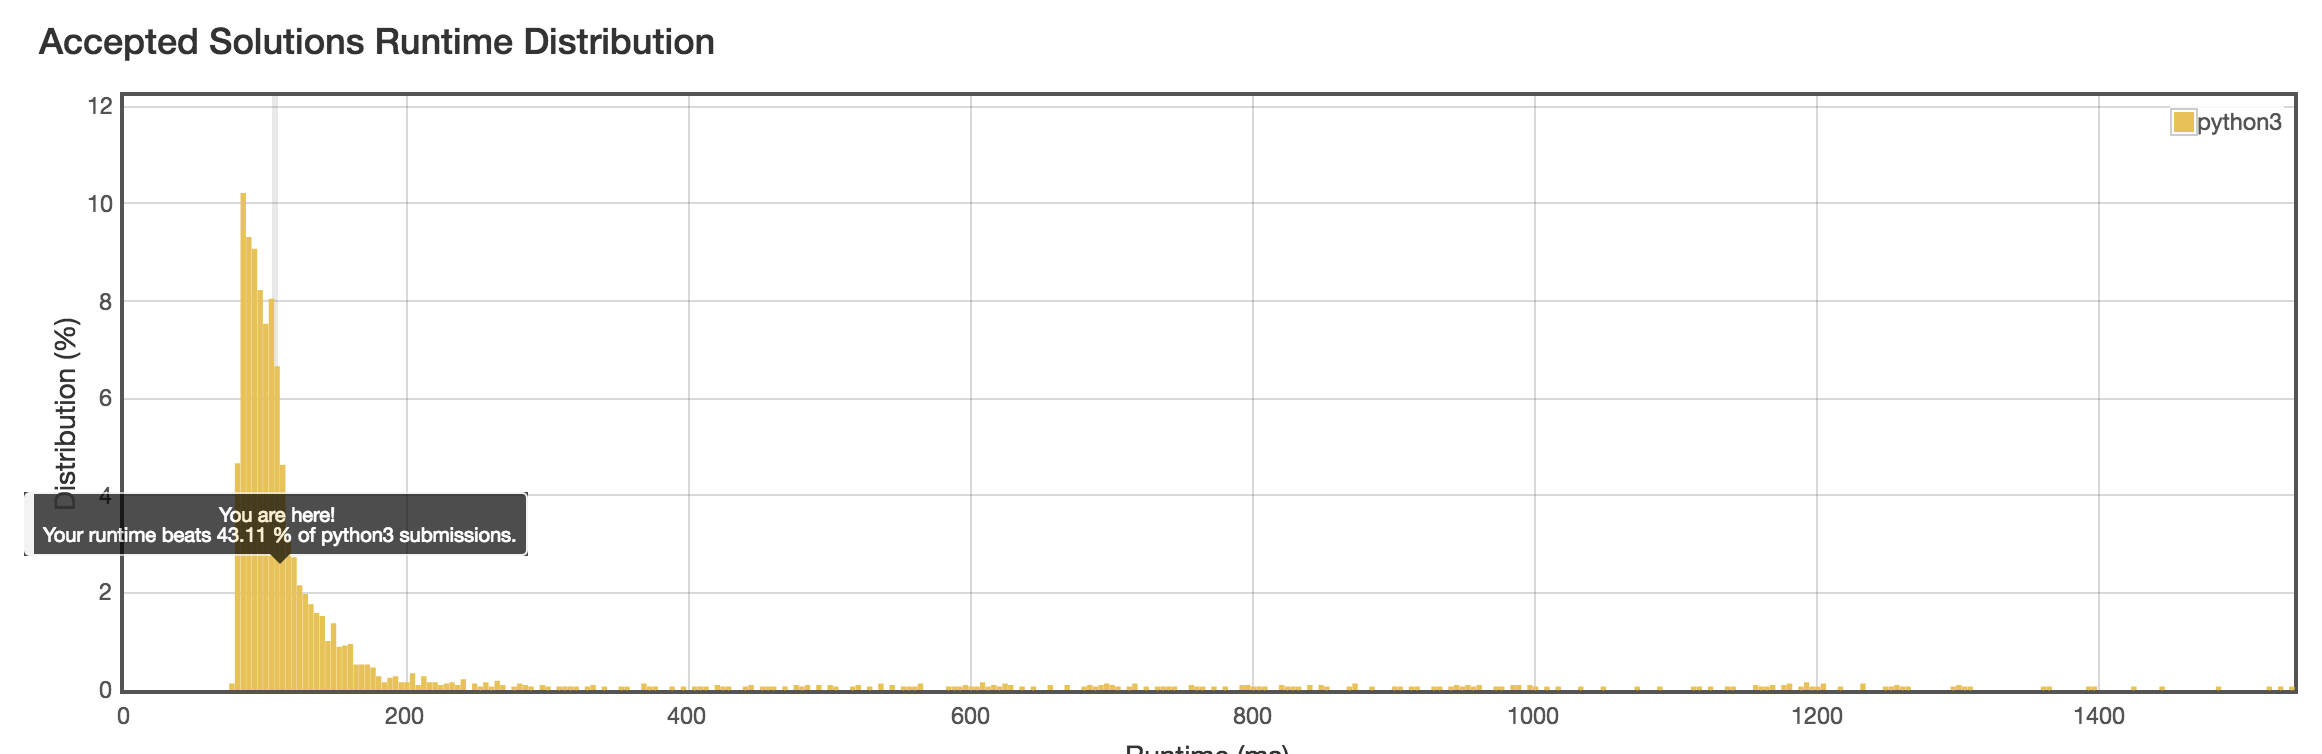


## 35.) Search Insert Position

Given a sorted array and a target value, return the index if the target is found. If not, return the index where it would be if it were inserted in order.

You may assume no duplicates in the array.
Example 1:
```bash
Input: [1,3,5,6], 5
Output: 2

```
Example 2:
```bash
Input: [1,3,5,6], 2
Output: 1

```
Example 3:
```bash
Input: [1,3,5,6], 7
Output: 4

```
Example 4:
```bash
Input: [1,3,5,6], 0
Output: 0
```

Let's first try a simple approach, naively loop over the array with complexity O(n)

In [47]:
class Solution:
    def searchInsert(self, nums, target):
        """
        :type nums: List[int]
        :type target: int
        :rtype: int
        """
        if target < nums[0]:
            return 0
        if target > nums[len(nums)-1]:
            return len(nums)
        for ii in range(0,len(nums)):
            if nums[ii] == target:
                return ii
            if nums[ii]< target and nums[ii+1] > target:
                return ii+1

## Results
Naive approach does reasonably well, made many mistakes on edge cases
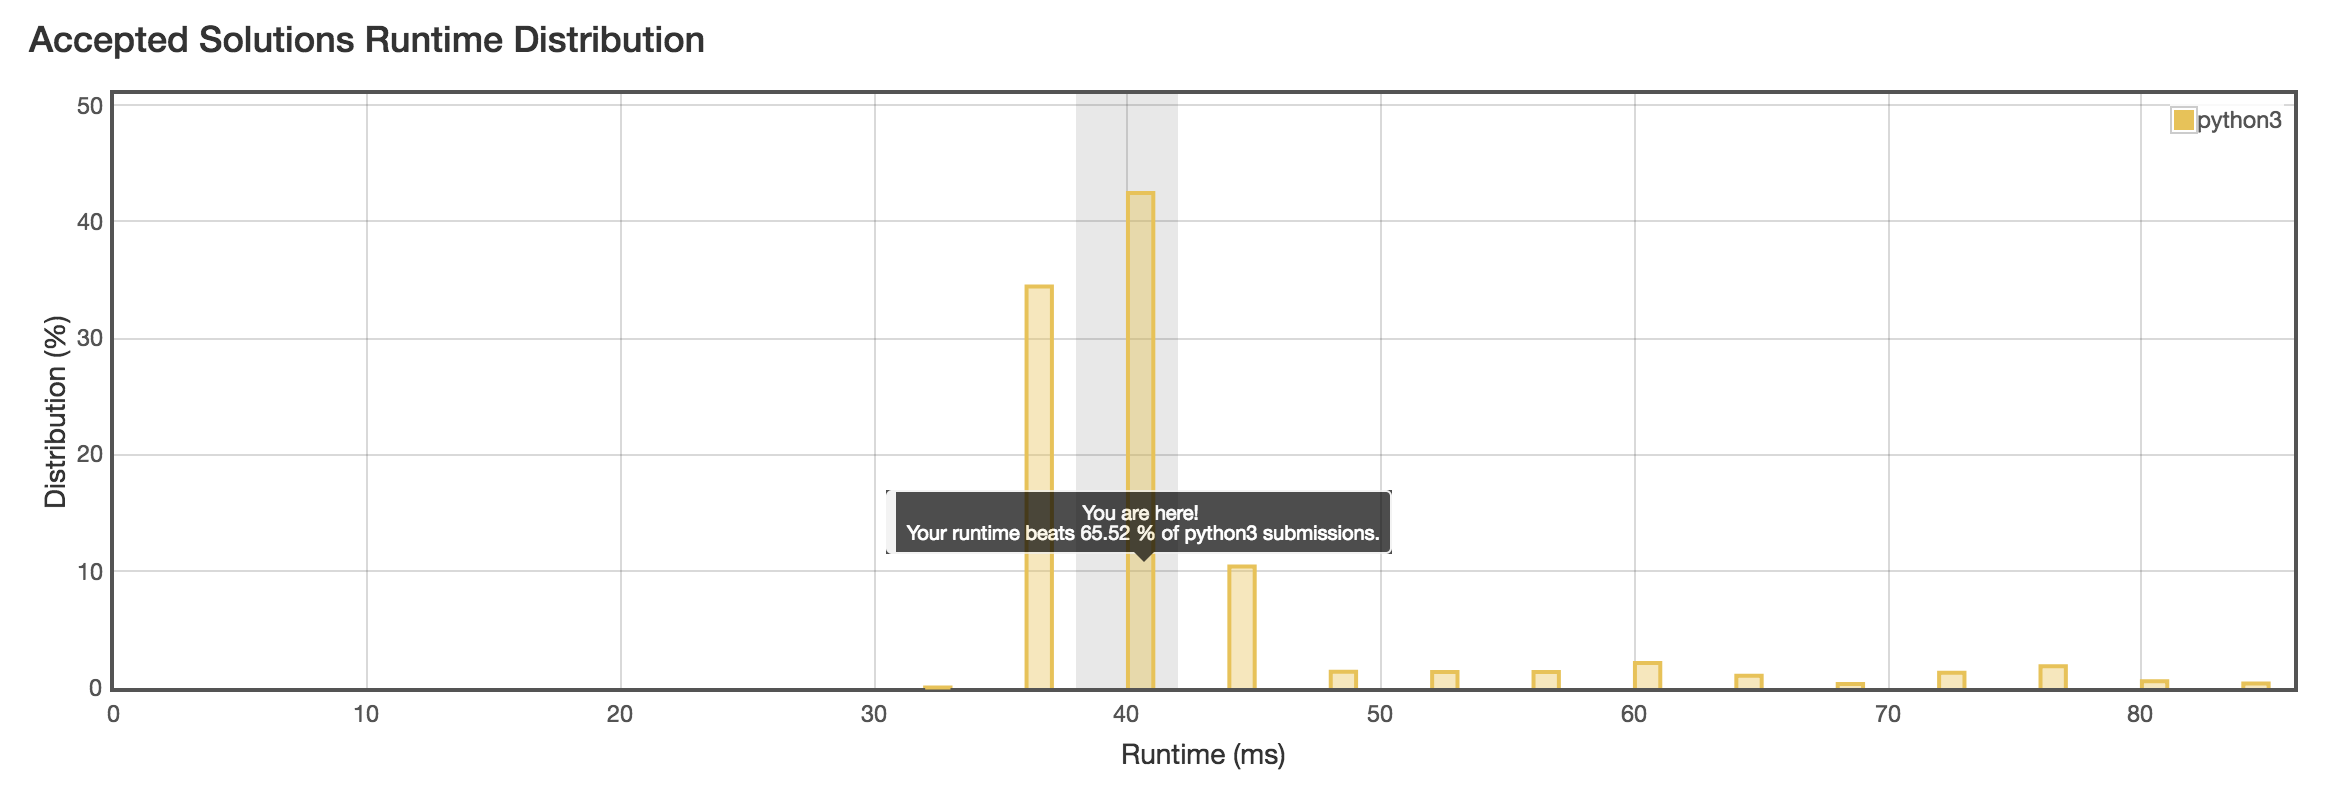

## 105.) Construct Binary Tree from Preorder and Inorder Traversal
Given preorder and inorder traversal of a tree, construct the binary tree.

Note:
You may assume that duplicates do not exist in the tree.

For example, given

preorder = [3,9,20,15,7]

inorder = [9,3,15,20,7]

Return the following binary tree:
``` bash
    3
   / \
  9  20
    /  \
   15   7

```
Notes:
Depth First Traversals:
 - (a) Inorder (Left, Root, Right)
 - (b) Preorder (Root, Left, Right)
 - (c) Postorder (Left, Right, Root)


In [113]:
#Definition for a binary tree node.
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None       
        
def make_branch(po_list, io_list):
    this_ = TreeNode(po_list[0])
    if len(po_list) == 1:
        return this_
    ii = 0
    for i in range(len(list(io_list))):
        if io_list[i] == po_list[0]:
            ii = i
    io_left = io_list[:ii]
    io_right = io_list[ii+1:]
    po_left = po_list[1:len(io_left)+1]
    po_right = po_list[len(io_left)+1:]
    if len(po_left) > 0:
        this_.left = make_branch(po_left,io_left)
    if len(po_right) > 0 :
        this_.right = make_branch(po_right,io_right)
    return this_
        
class Solution:
    def buildTree(self, preorder, inorder):
        """
        :type preorder: List[int]
        :type inorder: List[int]
        :rtype: TreeNode
        """
        if len(preorder) == 0 :
            return
        tree = make_branch(preorder, inorder)
        return tree

## Results
This bad boy was somewhat hard, the results work but slow. I don't care though, it is nice
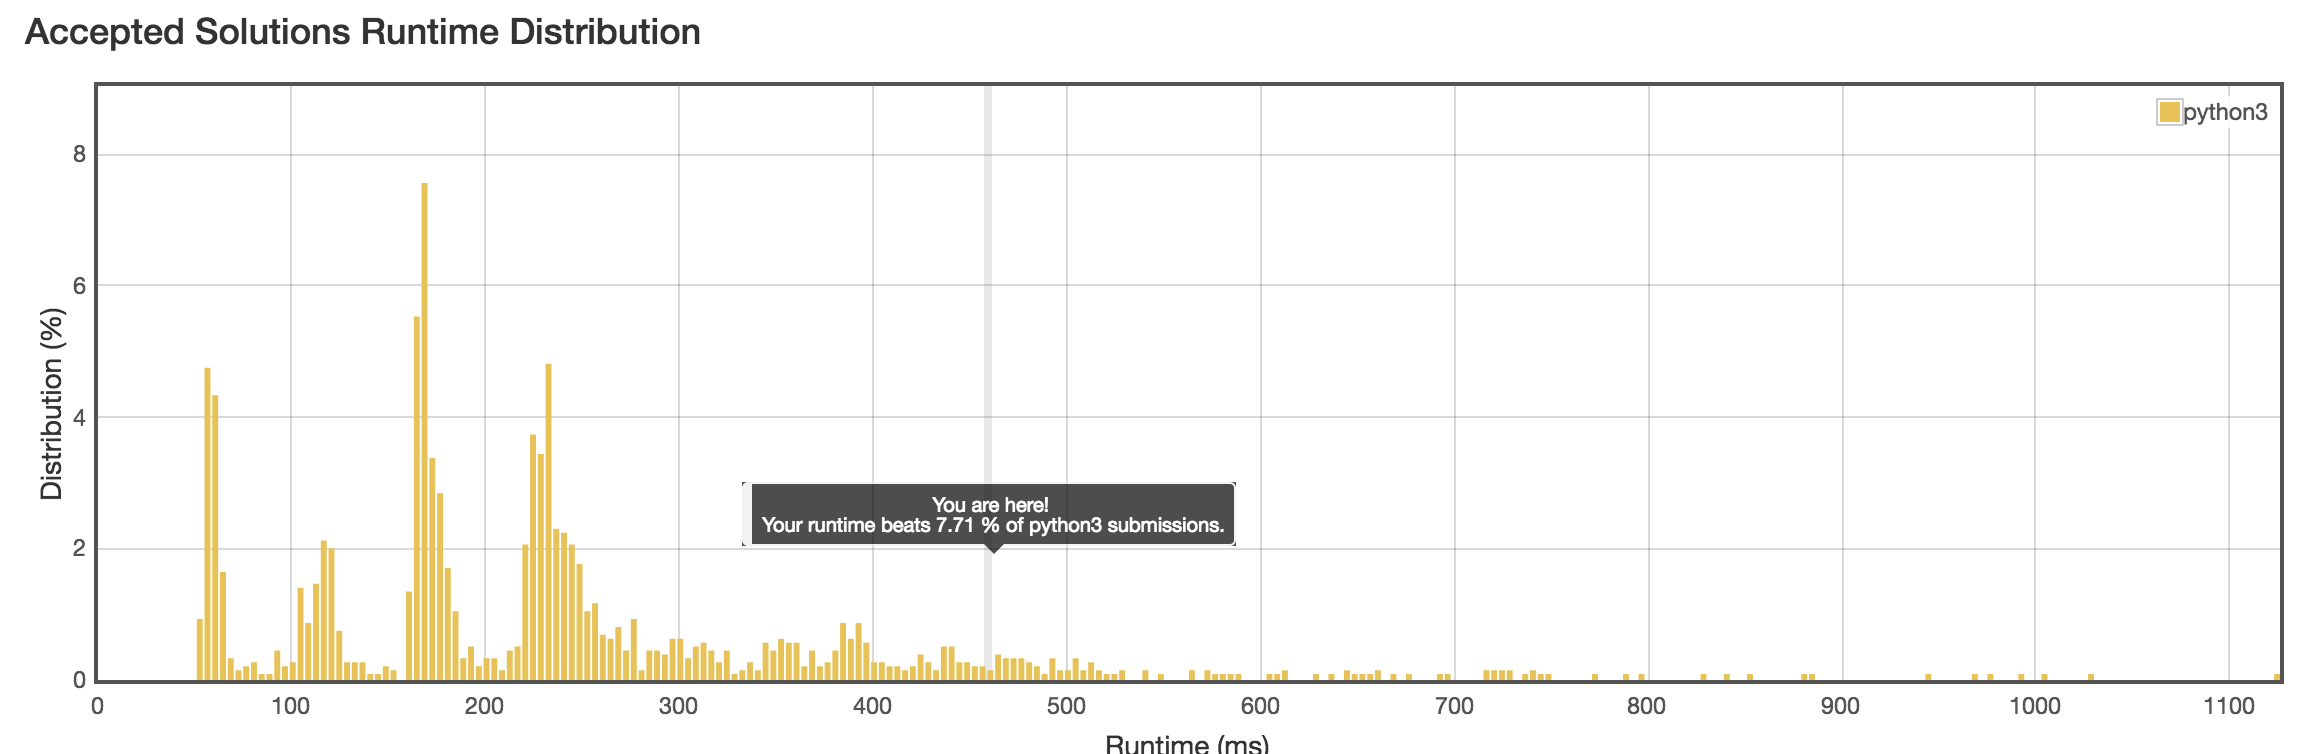

## 198. House Robber
You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed, the only constraint stopping you from robbing each of them is that adjacent houses have security system connected and it will automatically contact the police if two adjacent houses were broken into on the same night.

Given a list of non-negative integers representing the amount of money of each house, determine the maximum amount of money you can rob tonight without alerting the police.

Example 1:
``` bash
Input: [1,2,3,1]
Output: 4
Explanation: Rob house 1 (money = 1) and then rob house 3 (money = 3).
             Total amount you can rob = 1 + 3 = 4.

```
Example 2:
```bash
Input: [2,7,9,3,1]
Output: 12
Explanation: Rob house 1 (money = 2), rob house 3 (money = 9) and rob house 5 (money = 1).
             Total amount you can rob = 2 + 9 + 1 = 12.
```

In [61]:
# Sol by Patrick - not dynamic programming
def _max_rob(nums, can_rob):
    if can_rob == True:
        if len(nums) == 1 :
            return nums[0]
        m1 = nums[0] + _max_rob(nums[1:],False)
        m2 =  _max_rob(nums[1:],True)
        return max(m1,m2)
    else:
        if len(nums) == 1:
            return 0
        return _max_rob(nums[1:],True)
    
class Solution:
    def rob(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        return _max_rob(nums,True)

## Results
Solution works, but overflows time in LeetCode
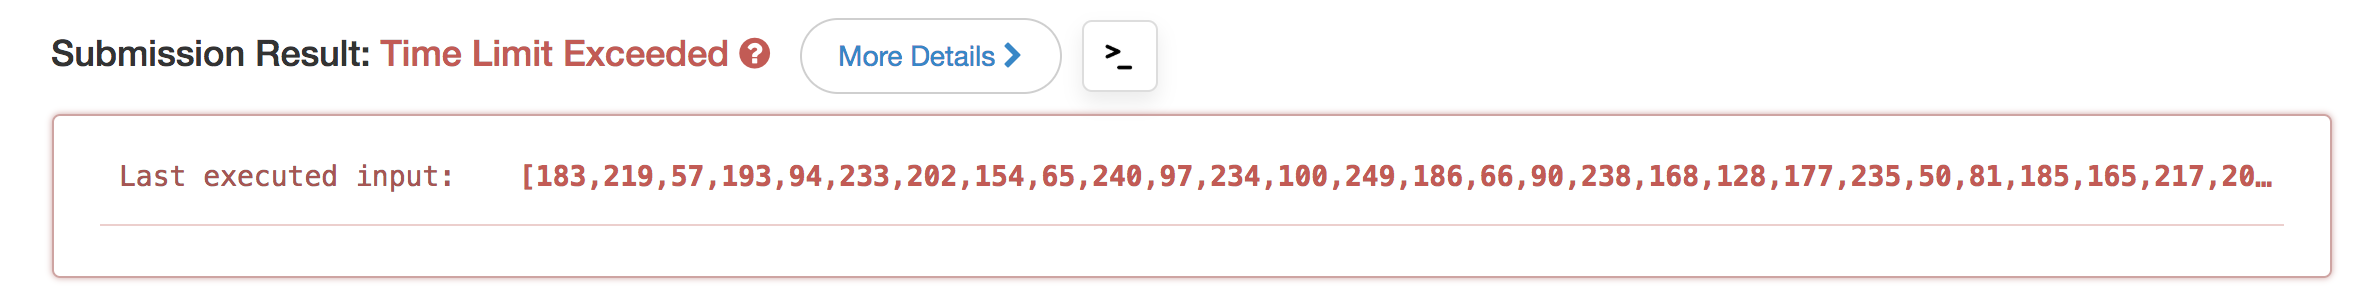

## 746.) Min Cost Climbing Stairs
On a staircase, the i-th step has some non-negative cost cost[i] assigned (0 indexed).

Once you pay the cost, you can either climb one or two steps. You need to find minimum cost to reach the top of the floor, and you can either start from the step with index 0, or the step with index 1.

Example 1:
``` bash
Input: cost = [10, 15, 20]
Output: 15
Explanation: Cheapest is start on cost[1], pay that cost and go to the top.

```
Example 2:
```badsh
Input: cost = [1, 100, 1, 1, 1, 100, 1, 1, 100, 1]
Output: 6
Explanation: Cheapest is start on cost[0], and only step on 1s, skipping cost[3].
```
Note:
cost will have a length in the range [2, 1000].
Every cost[i] will be an integer in the range [0, 999].

In [70]:
import numpy as np
mem = {}
def best(costs, mem={} ):
    if len(costs) == 1 :
        return 0, []
    if len(costs) == 2:
        i = np.argmin(costs)
        return costs[i], [i]
    length = len(costs)-1
    if length in mem:
        c1,steps = mem[length]
        c2, steps2 = mem[length]
    c1, steps = best(costs[1:])
    c2, steps2 = best(costs[2:])
    C1 = c1+costs[0]
    C2 = c2+costs[1]
    if C1 < C2:
        mem[length] = c1,[1+x for x in steps]
        return C1,[0]+ [1+x for x in steps]
    else:
        mem[length] = c2,[1+x for x in steps2]
        return C2, [1]+[2+x for x in steps2]


    


In [71]:
a = [10, 15, 20]
print(best(a))

(15, [1])


In [67]:
b = [1, 100, 1, 1, 1, 100, 1, 1, 100, 1]
print(best(b))

(6, [0, 2, 4, 6, 7, 9])
